# 1.

In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

def show_gray(*args, **kwargs):
    show(*args, cmap="gray", **kwargs)

def show(*args, **kwargs):
    import matplotlib.pyplot as plt
    if (len(args) == 1):
        plt.imshow(args[0], **kwargs)
    else:
        f, axis = plt.subplots(1,len(args))
        f.set_figheight(25)
        f.set_figwidth(25)
        for (image,i) in zip(args,range(len(args))):
            axis[i].imshow(image, **kwargs)
    plt.show()


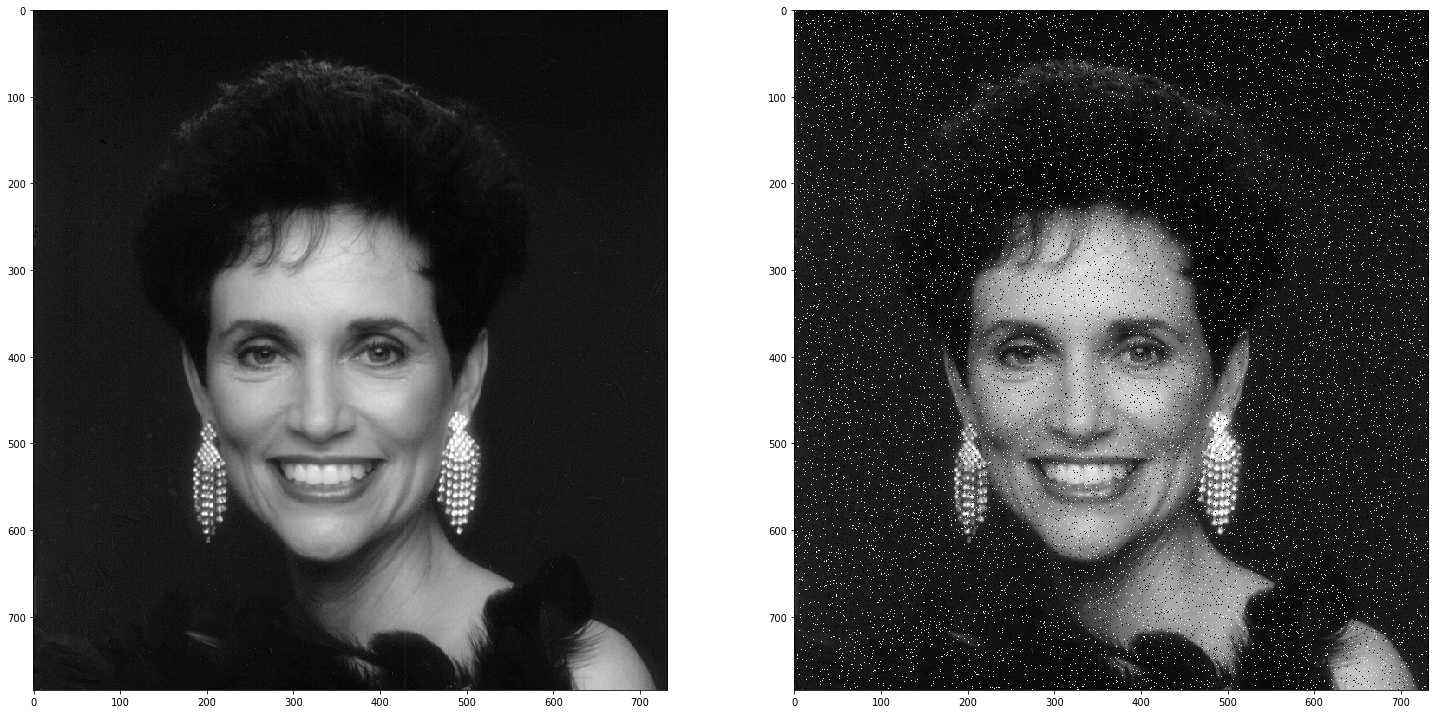

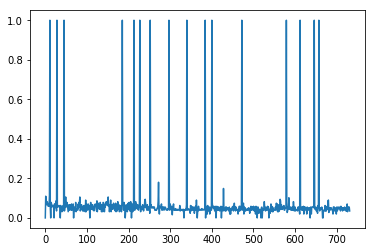

In [3]:
from skimage.util import random_noise
from skimage.filters import median

I = imageio.imread("woman.png")
I_sp = random_noise(I, mode="s&p")

show(I, I_sp, cmap="gray")
plt.plot(I_sp[0])
plt.show()

In [28]:
I_m = median(I_sp)
I_m2 = median(I_sp, selem=np.ones((15,15))
show_gray(I_sp, I_m, I_m2)
# The output becomes more blurry

plt.plot(I_m[0])
plt.show()

SyntaxError: invalid syntax (<ipython-input-28-3dbcb6830050>, line 3)

/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


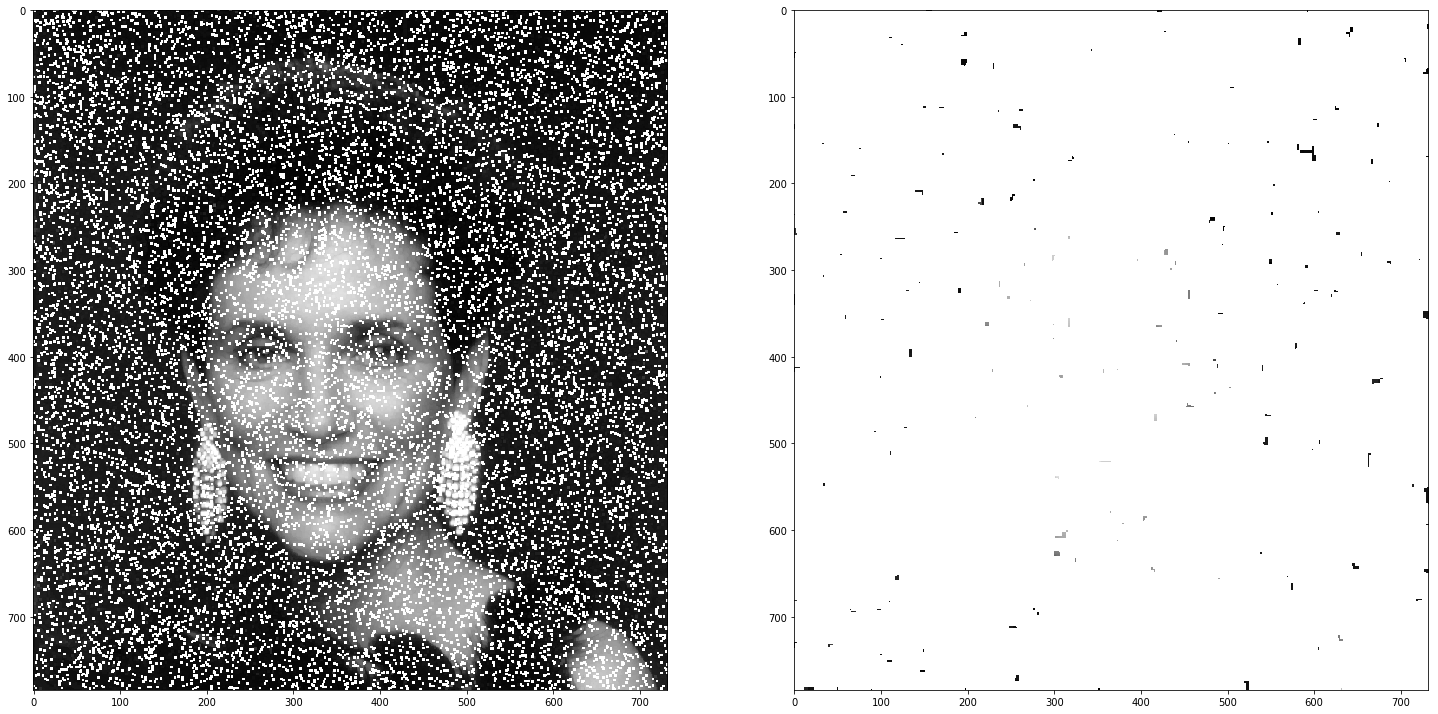

In [13]:
import skimage.filters.rank as rank
I_max = rank.maximum(I_sp, selem=np.ones((3,3)))
I_max2 = rank.maximum(I_sp, selem=np.ones((15,15)))
show_gray(I_max, I_max2)

# Image is almost white because only if one salt/1 is on the area, the complete 15x15 turns white

# 2.

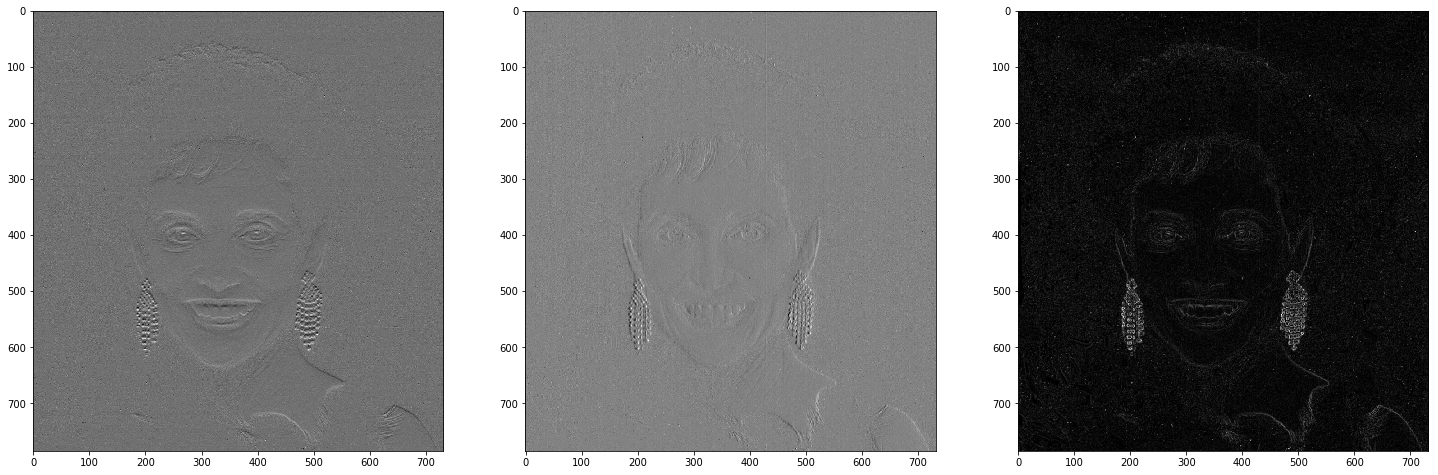

In [22]:
K_x = np.array([[-1],[1]], dtype=np.float64)
K_y = np.array([[-1,1]], dtype=np.float64)

from scipy.signal import convolve2d
G_x = convolve2d( I, K_x, mode="same" )
G_y = convolve2d( I, K_y, mode="same" )

G = np.sqrt(G_x*G_x + G_y*G_y)
show_gray(G_x, G_y, G)

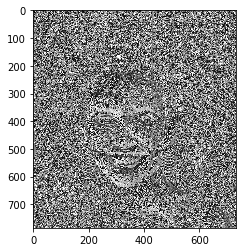

In [30]:
G_or = np.arctan2(G_x, G_y)
show_gray(G_or)